# PART A

For the part A i am going to use a dataset about Heart Failure  acquire on Kaggle(https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) , that has 13 variables and where "DEATH_EVENT" will be used as our response variable. 

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
df=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/heart/master/heart_failure_clinical_records_dataset.csv")

In [358]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [359]:
#descriptive statistics 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [360]:
#check if there is null values 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

As We can see there is no null value, thus we do not need to fix anything about this subject.
We are now going to check if there is not normal value such as negative values, or variable that has 0 as the minimum and should not(the non-binary variables)

In [361]:
#Check the minimum of each variable
df.min()

age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
time                            4.0
DEATH_EVENT                     0.0
dtype: float64

As we can see only the binary variables have a minimum value of 0 and no variable has negative values, so everything seems to be correct.

We are now going to standardize our data so the variables are on the same scale, since some models later in the project will need to have standardized data.

In [362]:
#Standarization of the data (only the non binary variables) so they have the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scale_cols = ['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [363]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,130,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,136,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,129,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,137,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,116,0,0,0.014235,1


# Feature selection 

We are going to use the forward selection as a feature selection method, to select the variables that will make the best prediction.

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


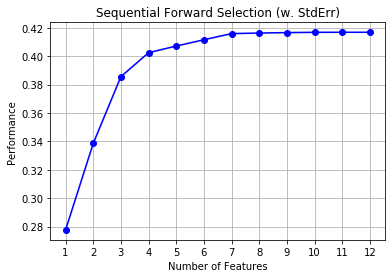

In [364]:
#forward selection 
#We are first going to put k_features= 12 IN ORDER TO have a general idea of how many variables will lead to good performance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=12,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["DEATH_EVENT"],1)
y = df["DEATH_EVENT"]
sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()

As we can see 7 seems to be a good number of variables to use to have the performance. Indeed, after 7 variables using more variables does not leed to better performance. Thus for our model, we are going to use 7 variables.

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'time')

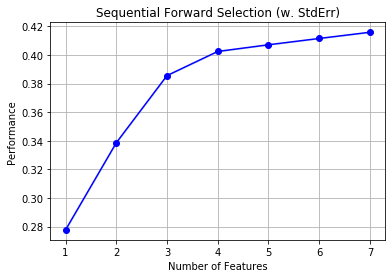

In [365]:
#forward selection 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["DEATH_EVENT"],1)
y = df["DEATH_EVENT"]
sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
sfs.k_feature_names_

'age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium','sex','time' Are the 7 variables that we will use for our models to optimize our performance.

We are going to create a data frame with only the features we will use for the creations of our models.

In [366]:
my_features=df[['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium','sex','time']]

In [367]:
df2=my_features
df2 = pd.concat([df2, df['DEATH_EVENT']], axis=1)
df2.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.157303,130,1,0.000000,1
1,0.272727,1.000000,0.363636,0.067416,136,1,0.007117,1
2,0.454545,0.015693,0.090909,0.089888,129,1,0.010676,1
3,0.181818,0.011227,0.090909,0.157303,137,1,0.010676,1
4,0.454545,0.017479,0.090909,0.247191,116,0,0.014235,1


#  Models

Before to construct our models we are going to split the data.

In [368]:
#Define X and Y
X1=df2.drop(["DEATH_EVENT"],1)
Y1=df2['DEATH_EVENT']

In [369]:
#split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.3, random_state=10)


# Linear Regression 

In [370]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [371]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [372]:
#Train the model using the training sets
regr.fit(x_train,y_train)


LinearRegression()

In [373]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)


In [374]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

Mean squared error: 0.14


0.3764160381239714

In [375]:
#R2 score 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.35122601841081325

In [376]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3041134675980308

# Decision tree model 

In [377]:
#import the necessary library 
from sklearn.tree import DecisionTreeClassifier

In [378]:
#decision tree model
clf = DecisionTreeClassifier(criterion = 'entropy')

I have decided to add the entropy  critarion since it attempts to maximize the mutual information  in the decision tree

In [379]:
#Training the decision tree classifier. 
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [380]:
#Predicting labels on the test set.
y_pred_tree=  clf.predict(x_test)

In [381]:
# The RMSE
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_tree))
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
rmse

Mean squared error: 0.20


0.4472135954999579

In [382]:
#R2 score 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_tree)

0.08422837761447155

In [383]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_tree)

0.2

# XG BOOST

In [384]:
#import the library 
import xgboost as xgb

In [385]:
#create and fit the model 
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [386]:
# make predictions 
y_predboost= XG.predict(x_test)

In [387]:
# RMSE
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predboost))
rmsE = sqrt(mean_squared_error(y_test, y_predboost))
rmsE

Mean squared error: 0.13


0.3651483716701107

In [388]:
#R2 score 
from sklearn.metrics import r2_score
r2_score(y_test, y_predboost)

0.38948558507631437

In [389]:
#MAE score 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predboost)

0.13333333333333333

# SVM

In [390]:
from sklearn.svm import SVC

In [391]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)


SVC(kernel='linear')

In [392]:
y_predsvc = svclassifier.predict(x_test)

In [393]:
# RMSE
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_predsvc))
rms = sqrt(mean_squared_error(y_test, y_predsvc))
rms

Mean squared error: 0.19


0.4346134936801766

In [394]:
#R2
from sklearn.metrics import r2_score
r2_score(y_test, y_predsvc)

0.1351045788581121

In [395]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predsvc)

0.18888888888888888

# BEST MODEL

The ideal model would be the model with the highest R2 score and the Lowest RMSE and MAE. I have decided to keep XG BOOST as the model since it has this characteristics. The R2 score is good (0.38) without being too high that could have been the result of overfitting. 

# PART B

In [396]:
df3=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/ferti/main/fertility.csv")

In [397]:
df3.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [398]:
 #for all the binary  categorical values change yes as 1 and no as 0
dummy={'yes':1,'no':0}
df3['Accident or serious trauma']=df3['Accident or serious trauma'].apply(lambda x:dummy[x])
df3['Surgical intervention']=df3['Surgical intervention'].apply(lambda x:dummy[x])

In [399]:
df3.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,1,1,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,0,1,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,0,0,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,1,1,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,1,0,more than 3 months ago,once a week,never,9,Altered


In [400]:
ss=pd.get_dummies(df3.Season, prefix='Season')
df3 = pd.concat([df3, ss], axis=1)
HF=pd.get_dummies(df3['High fevers in the last year'], prefix='High fevers in the last year')
df3 = pd.concat([df3, HF], axis=1)
F=pd.get_dummies(df3['Frequency of alcohol consumption'], prefix='Frequency of alcohol consumption')
df3 = pd.concat([df3,F], axis=1)
SH=pd.get_dummies(df3['Smoking habit'], prefix='Smoking habit')
df3 = pd.concat([df3,SH], axis=1)
D=pd.get_dummies(df3.Diagnosis, prefix='Diagnosis')
df3 = pd.concat([df3,D], axis=1)



# Binary Logistic Regression 

In [401]:
df4 = pd.concat([df3], axis=1)

In [402]:
del df4['Season']
del df4['High fevers in the last year']
del df4['Frequency of alcohol consumption']
del df4['Smoking habit']
del df4['Diagnosis']


In [403]:
df4

,Age,Childish diseases,Accident or serious trauma,Surgical intervention,Number of hours spent sitting per day,Season_fall,Season_spring,Season_summer,Season_winter,High fevers in the last year_less than 3 months ago,...,Frequency of alcohol consumption_every day,Frequency of alcohol consumption_hardly ever or never,Frequency of alcohol consumption_once a week,Frequency of alcohol consumption_several times a day,Frequency of alcohol consumption_several times a week,Smoking habit_daily,Smoking habit_never,Smoking habit_occasional,Diagnosis_Altered,Diagnosis_Normal
0,30,no,1,1,16,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,35,yes,0,1,6,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,27,yes,0,0,9,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,32,no,1,1,7,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,30,yes,1,0,9,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5,30,yes,0,1,9,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,30,no,0,0,8,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,36,yes,1,1,7,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
8,30,no,0,1,5,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
9,29,yes,0,0,5,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [404]:

X = df4.drop(['Childish diseases'],1)
y = df4['Childish diseases']


In [405]:
#Train the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [406]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train,y_train)

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [407]:
y_prediction=model1.predict(X_test)
y_prediction

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes'], dtype=object)

In [408]:
#Confusion Metrics 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prediction)

array([[ 0,  5],
       [ 1, 24]])

In [409]:
# calculate AUC
auc = roc_auc_score(labelencoder.fit_transform(y_test), labelencoder.fit_transform( y_prediction))
print('AUC: %.3f' % auc)

AUC: 0.480


In [410]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate roc curve
fpr, tpr, thresholds = roc_curve(labelencoder.fit_transform(y_test), labelencoder.fit_transform( y_prediction))



In [411]:
from sklearn import metrics
metrics.classification_report(y_test,y_prediction)

'              precision    recall  f1-score   support\n\n          no       0.00      0.00      0.00         5\n         yes       0.83      0.96      0.89        25\n\n    accuracy                           0.80        30\n   macro avg       0.41      0.48      0.44        30\nweighted avg       0.69      0.80      0.74        30\n'

# Multinomial Logistic Regression

In [412]:
df5 = pd.concat([df3], axis=1)

In [413]:
df5['Childish diseases']=df5['Childish diseases'].apply(lambda x:dummy[x])

In [414]:
del df5['Season']
del df5['High fevers in the last year']
del df5['Frequency of alcohol consumption']
del df5['Diagnosis']
del df5['Smoking habit_daily']
del df5['Smoking habit_never']
del df5['Smoking habit_occasional']

In [415]:
df5.head()

,Age,Childish diseases,Accident or serious trauma,Surgical intervention,Smoking habit,Number of hours spent sitting per day,Season_fall,Season_spring,Season_summer,Season_winter,High fevers in the last year_less than 3 months ago,High fevers in the last year_more than 3 months ago,High fevers in the last year_no,Frequency of alcohol consumption_every day,Frequency of alcohol consumption_hardly ever or never,Frequency of alcohol consumption_once a week,Frequency of alcohol consumption_several times a day,Frequency of alcohol consumption_several times a week,Diagnosis_Altered,Diagnosis_Normal
0,30,0,1,1,occasional,16,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,35,1,0,1,daily,6,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,27,1,0,0,never,9,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,32,0,1,1,never,7,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,30,1,1,0,never,9,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [416]:
X1 = df5.drop(['Smoking habit'],1)
y1 = df5['Smoking habit']


In [417]:
#Train the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, random_state=10)

In [418]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train,y_train)

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [419]:
y_prediction2=model1.predict(X_test)
y_prediction2

array(['never', 'never', 'never', 'never', 'occasional', 'never', 'never',
       'occasional', 'never', 'never', 'never', 'never', 'occasional',
       'daily', 'never', 'never', 'never', 'never', 'never', 'never',
       'never', 'never', 'occasional', 'never', 'never', 'never', 'never',
       'never', 'never', 'never'], dtype=object)

In [420]:
#Confusion Metrics 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prediction2)

array([[ 0,  5,  1],
       [ 0, 13,  1],
       [ 1,  7,  2]])

In [422]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_prediction2, target_names=['never','occasional','daily']))



Classification Report

              precision    recall  f1-score   support

       never       0.00      0.00      0.00         6
  occasional       0.52      0.93      0.67        14
       daily       0.50      0.20      0.29        10

    accuracy                           0.50        30
   macro avg       0.34      0.38      0.32        30
weighted avg       0.41      0.50      0.41        30



# Ordinal logistic regression 

In [423]:
mul_lr = linear_model.LogisticRegression( 
  multi_class='multinomial', 
  solver='newton-cg', 
  fit_intercept=True 
  ).fit(X1,y1) 

In [424]:
y_prediction3=model1.predict(X_test)
y_prediction3

array(['never', 'never', 'never', 'never', 'occasional', 'never', 'never',
       'occasional', 'never', 'never', 'never', 'never', 'occasional',
       'daily', 'never', 'never', 'never', 'never', 'never', 'never',
       'never', 'never', 'occasional', 'never', 'never', 'never', 'never',
       'never', 'never', 'never'], dtype=object)

In [425]:
#Confusion Metrics 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prediction3)

array([[ 0,  5,  1],
       [ 0, 13,  1],
       [ 1,  7,  2]])

In [426]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_prediction3, target_names=['never','occasional','daily']))



Classification Report

              precision    recall  f1-score   support

       never       0.00      0.00      0.00         6
  occasional       0.52      0.93      0.67        14
       daily       0.50      0.20      0.29        10

    accuracy                           0.50        30
   macro avg       0.34      0.38      0.32        30
weighted avg       0.41      0.50      0.41        30



# Best Model

Looking at the confusion metrics and the other metrics I have decided to choose the Binary Logistic regression as the best model.Indeed, for instance model 1 has hight precision and recall score. 

# Part C:Clustering (data set part a)

In [427]:
#Hierarchical clustering

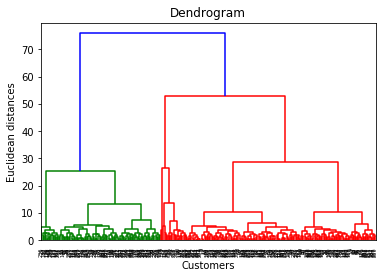

In [428]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Based on what the Dendrogram shows I think that 4 clusters should be imposed on the data.


In [429]:
#K-means clustering

In [430]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

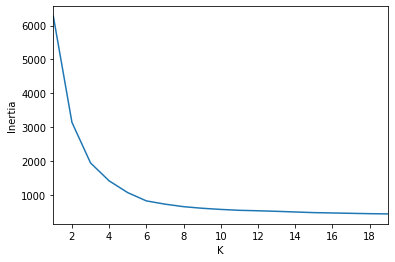

In [431]:
#elbow plot
inertias = []
#i have decided to choose a range from 1 to 20 for the K value 
sizes = range(1, 20)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

From this graph  5 seems to an appropriate value for K.This number is in line with the number of clusters selected from the output of the hierarchical Dendrogram which was 4.